In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load LeBron's performance data
regular_season = pd.read_csv('/content/Regular_Season.csv')
playoffs = pd.read_csv('/content/Playoffs.csv')

# Select relevant columns and calculate per-game averages using .loc
lebron_regular = regular_season.loc[regular_season['PLAYER'] == 'LeBron James', ['year', 'PTS', 'REB', 'AST', 'GP']].copy()
lebron_playoffs = playoffs.loc[playoffs['PLAYER'] == 'LeBron James', ['year', 'PTS', 'REB', 'AST', 'GP']].copy()


In [11]:
# Normalize stats per game using .loc
lebron_regular.loc[:, 'PTS_pg'] = lebron_regular['PTS'] / lebron_regular['GP']
lebron_regular.loc[:, 'REB_pg'] = lebron_regular['REB'] / lebron_regular['GP']
lebron_regular.loc[:, 'AST_pg'] = lebron_regular['AST'] / lebron_regular['GP']
lebron_playoffs.loc[:, 'PTS_pg'] = lebron_playoffs['PTS'] / lebron_playoffs['GP']
lebron_playoffs.loc[:, 'REB_pg'] = lebron_playoffs['REB'] / lebron_playoffs['GP']
lebron_playoffs.loc[:, 'AST_pg'] = lebron_playoffs['AST'] / lebron_playoffs['GP']

In [12]:
# Load NBA pace data
main_df = pd.read_csv('/content/main_df.csv')
main_df.loc[:, 'Pace'] = (main_df['FGA'] + main_df['TOV'] + 0.44 * main_df['FTA'] - main_df['ORB']) / main_df['G']
average_pace_per_year = main_df.groupby('Year')['Pace'].mean().reset_index()

# Merge pace data with LeBron's stats
lebron_regular.loc[:, 'Year'] = lebron_regular['year'].apply(lambda x: int(x.split('-')[0]))
lebron_playoffs.loc[:, 'Year'] = lebron_playoffs['year'].apply(lambda x: int(x.split('-')[0]))
lebron_regular = lebron_regular.merge(average_pace_per_year, on='Year')
lebron_playoffs = lebron_playoffs.merge(average_pace_per_year, on='Year')

# Combine regular and playoffs data
lebron_combined = pd.concat([lebron_regular.assign(Season='Regular'), lebron_playoffs.assign(Season='Playoffs')])

# Calculate correlations
correlation_combined = lebron_combined.loc[:, ['Pace', 'PTS_pg', 'REB_pg', 'AST_pg']].corr()

Text(0.5, 1.0, 'Correlation Heatmap - Combined Stats')

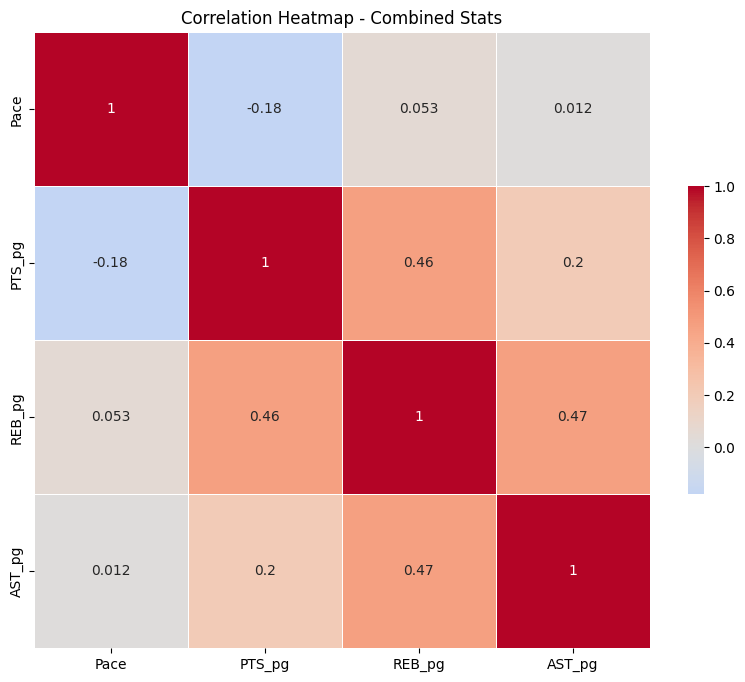

In [13]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_combined, annot=True, cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap - Combined Stats')


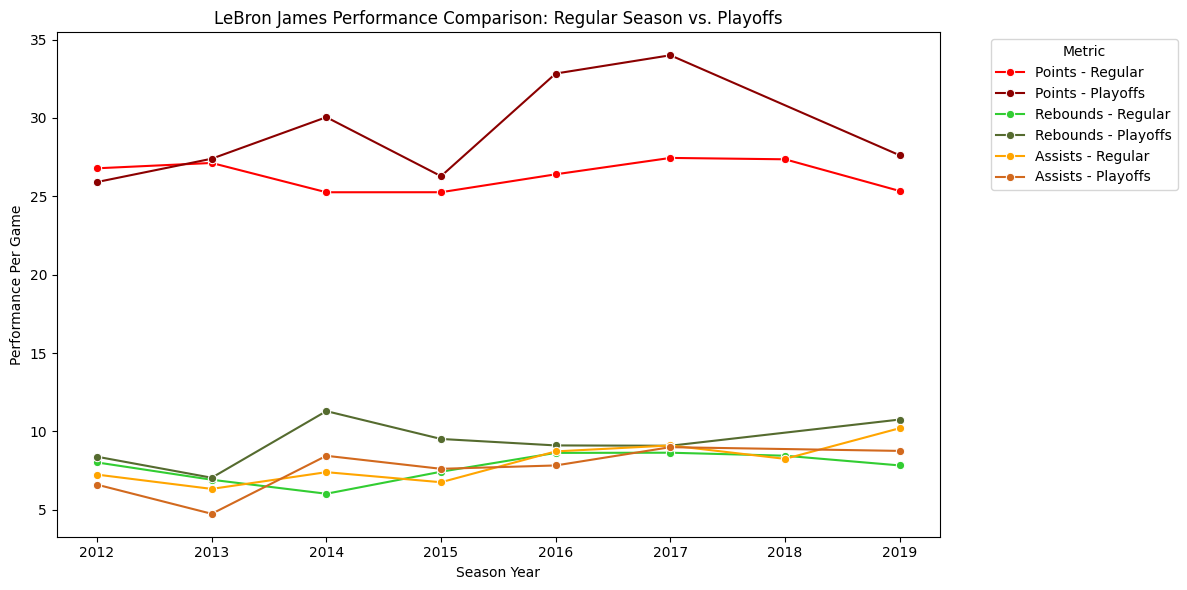

In [14]:
# Plot comparison of regular season vs. playoffs
plt.figure(figsize=(12, 6))
palette = {'Points - Regular': 'red', 'Points - Playoffs': 'darkred',
           'Rebounds - Regular': 'limegreen', 'Rebounds - Playoffs': 'darkolivegreen',
           'Assists - Regular': 'orange', 'Assists - Playoffs': 'chocolate'}

# Points
sns.lineplot(data=lebron_combined[lebron_combined['Season'] == 'Regular'], x='Year', y='PTS_pg', label='Points - Regular', color=palette['Points - Regular'], marker='o')
sns.lineplot(data=lebron_combined[lebron_combined['Season'] == 'Playoffs'], x='Year', y='PTS_pg', label='Points - Playoffs', color=palette['Points - Playoffs'], marker='o')

# Rebounds
sns.lineplot(data=lebron_combined[lebron_combined['Season'] == 'Regular'], x='Year', y='REB_pg', label='Rebounds - Regular', color=palette['Rebounds - Regular'], marker='o')
sns.lineplot(data=lebron_combined[lebron_combined['Season'] == 'Playoffs'], x='Year', y='REB_pg', label='Rebounds - Playoffs', color=palette['Rebounds - Playoffs'], marker='o')

# Assists
sns.lineplot(data=lebron_combined[lebron_combined['Season'] == 'Regular'], x='Year', y='AST_pg', label='Assists - Regular', color=palette['Assists - Regular'], marker='o')
sns.lineplot(data=lebron_combined[lebron_combined['Season'] == 'Playoffs'], x='Year', y='AST_pg', label='Assists - Playoffs', color=palette['Assists - Playoffs'], marker='o')

plt.title('LeBron James Performance Comparison: Regular Season vs. Playoffs')
plt.xlabel('Season Year')
plt.ylabel('Performance Per Game')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()